<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, SCORERS
import tensorflow_addons as tfa

from tensorflow import keras

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # importing ploting libraries
import seaborn as sns # importing seaborn for statistical plots
from collections import Counter

from sklearn.metrics import make_scorer,accuracy_score, f1_score, confusion_matrix, classification_report, recall_score # calculate accuracy measures and confusion matrix

from imblearn.over_sampling import SMOTE
from keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import sklearn

In [3]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [4]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [5]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [6]:
# Leitura do dataframe:
df = pd.read_csv('/total_10.csv')

In [10]:
df_total = df.copy()

In [11]:
df_total.set_index('id', inplace=True)

Retirando algumas colunas para testar

In [12]:
df_total.drop(columns = ['cnae2','md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4','ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07',
       'ind08', 'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15',
       'ind16', 'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23',
       'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31',
       'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39',
       'ind40', 'ind41', 'ind42', 'ind43'], inplace = True)

In [13]:
df_total.columns

Index(['rf2', 'target', 'cnae_secao', 'ind_g1_mv', 'ind_g1', 'ind_g2_mv',
       'ind_g2', 'mc_g1_mv', 'mc_g1', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o', 'mc1_o',
       'mc3_o', 'mc4_o'],
      dtype='object')

GET DUMMIES

In [14]:
df_total = pd.get_dummies(df_total)

In [15]:
X_treino = df_total[df_total['target']!= 2]

In [16]:
df_X=X_treino.copy()

In [17]:
df_y = df_X['target']
df_X = df_X.drop(columns= ['target'])

In [18]:
X_test = df_total[df_total['target']== 2].drop(columns= ['target'])

Tratando o Balanceamento da Amostra

In [19]:
qtd = Counter(X_treino['target'])
qtd

Counter({0: 8513, 1: 2520})

In [20]:
np.round(100*qtd[1]/qtd[0], 4)

29.6018

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
over = SMOTE(sampling_strategy = 0.5) # Reamostrar a classe minoritária para ter 10% da classe majoritária
under = RandomUnderSampler(sampling_strategy = 0.85) # Seleciona a classe majoritária para ter 50%

Usando um Pileline

In [23]:
from imblearn.pipeline import Pipeline

In [24]:
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps = steps)

df_X e df_y são nossos dataframes originais.

In [25]:
# Aplica o pipeline
X, y = pipeline.fit_resample(df_X, df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Antes/Depois:

In [26]:
print(Counter(df_y),Counter(y))

Counter({0: 8513, 1: 2520}) Counter({0: 5007, 1: 4256})


In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [30]:
X.shape

(9263, 48)

In [31]:
# Número de Neurônios na Input Layer:
N_I = 48

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 400

N_H2 = 200

N_H3=100

N_H4 = 50

N_H5 = 25

N_H6 = 2

# Função de Ativação da Hidden Layer:
FA_H = tf.nn.leaky_relu
#FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [32]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [33]:
Algoritmo_Opt = tf.keras.optimizers.Adamax()
#Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07 , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
Metrics_Perf = tf.keras.metrics.binary_accuracy
#RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function,metrics = Metrics_Perf)
#RN.compile( loss = Loss_Function,metrics = Metrics_Perf)

In [34]:
def create_model():
  RN= Sequential()
  RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
  RN.add(Dropout(0.1))
  RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
  RN.add(Dropout(0.1))
  RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
  RN.add(Dropout(0.1))
  RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
  RN.add(Dropout(0.1))
  RN.add(Dense(N_H5, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
  RN.add(Dropout(0.1))
  #RN.add(Dense(N_H6, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
  #RN.add(Dropout(0.1))
  RN.add(Dense(units= N_O, activation= FA_O))
  RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function,metrics = Metrics_Perf)
  return RN


In [35]:
# evaluate pipeline
#cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 20111974)
cv = StratifiedKFold(n_splits = 10, random_state = 20111974)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [36]:
model = KerasClassifier(build_fn=create_model, verbose =1)

In [37]:
scores = cross_val_score(model, X, y, scoring = 'f1_macro', cv = cv, n_jobs = -1,fit_params= {'epochs': 100,'batch_size': 20})
scores


array([0.679, 0.7  , 0.683, 0.67 , 0.674, 0.7  , 0.775, 0.789, 0.794,
       0.782])

In [38]:
scores.mean()

0.7245547544488119

In [39]:
scores.std()

0.05028441866460299

In [40]:
print(scores.mean(),scores.std())

0.7245547544488119 0.05028441866460299


### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [41]:
model = KerasClassifier(build_fn=create_model, verbose =1)

In [42]:
#callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 10, min_delta = 0.001)]
hist= model.fit(X, y, epochs = 100, batch_size = 20)
#hist= model.fit(X_2, y_2, epochs = 100, batch_size = 20)

Epoch 1/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2252 - binary_accuracy: 0.6218
Epoch 2/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2173 - binary_accuracy: 0.6368
Epoch 3/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2137 - binary_accuracy: 0.6445
Epoch 4/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2117 - binary_accuracy: 0.6536
Epoch 5/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2095 - binary_accuracy: 0.6576
Epoch 6/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2076 - binary_accuracy: 0.6653
Epoch 7/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2050 - binary_accuracy: 0.6706
Epoch 8/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2014 - binary_accuracy: 0.6752
Epoch 9/100
464/464 [==============================] - 1s 3ms/step - loss: 0.2002 - binary_accuracy: 0.6776
Epoch 10/100
464/464 [======

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [ ]:
F1_Test=f1_score(y_teste, RN.predict_classes(X_teste), average="macro")
print(f'F1: {F1_Test}')

F1: 0.7304770011664933


In [ ]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 1s 2ms/step - loss: 0.1049 - binary_accuracy: 0.8668


[0.10494696348905563, 0.8667633533477783]

In [ ]:
F1_X=f1_score(df_y, RN.predict_classes(df_X), average="macro")
print(f'F1: {F1_X}')

F1: 0.8300310851611177


In [ ]:
RN.evaluate(X_treinamento, y_treinamento)

261/261 [==============================] - 0s 1ms/step - loss: 0.0383 - binary_accuracy: 0.9572


[0.03830168768763542, 0.9571737051010132]

In [ ]:
F1_Trein=f1_score(y_treinamento, RN.predict_classes(X_treinamento), average="macro")
print(f'F1: {F1_Trein}')

NameError: ignored

A seguir, a matriz de confusão:

In [ ]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

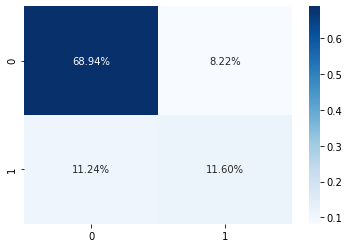

In [ ]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [43]:
X_test_2 = np.array(X_test)

In [44]:
y_test = model.predict(X_test_2)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
32/32 [==============================] - 0s 985us/step


In [45]:
df_submit = pd.concat([pd.DataFrame(X_test.index,columns=['id']),pd.DataFrame(y_test,columns=['target']).astype('boolean')],axis=1)



In [46]:
df_submit.head()

,id,target
0,3411,False
1,2177,False
2,8400,True
3,464,True
4,6672,True


In [47]:
df_submit['target'].value_counts()

False    653
True     347
Name: target, dtype: Int64

In [48]:
F = df_submit['target'].value_counts()[0]
T = df_submit['target'].value_counts()[1]

In [49]:
df_submit.to_csv(f'/PyLadies_NL_86_F1_{round(scores.mean(),4)}_std_{round(scores.std(),4)}_F{F}_T{T}.csv',index = False, sep = ',')

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.

### Salvar a Rede Neural

In [ ]:
# Save the weights
model.save('/RN_61.h5')

AttributeError: ignored